In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
(train_values, train_lables), (test_values, test_lables) = fashion_mnist.load_data()
train_values, val_values, train_lables, val_labels = train_test_split(train_values, train_lables, test_size=0.2)
print(train_values.shape, train_lables.shape)
print(val_values.shape, val_labels.shape)
print(test_values.shape, test_lables.shape)
print(train_lables[10000])

4431872/4422102 [==============================] - 0s 0us/step
(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)
6


In [3]:
model = models.Sequential([
    layers.Conv2D(4, (2, 2), activation = 'linear', input_shape = (28,28,1)),
    layers.MaxPool2D((1, 1)),
    layers.Conv2D(128, (6, 6), activation = 'relu'),
    layers.MaxPool2D((1, 1)),
    layers.Conv2D(256, (5, 5), activation = 'relu'),
    layers.MaxPool2D((6, 6)),
    layers.Flatten(),
    layers.Dense(128, kernel_regularizer=regularizers.L1(1e-4), activation= 'linear'),
    layers.Dropout(0.5)])
last_shape = model.layers[-1].output_shape
model.add(layers.Reshape((last_shape[1] // 2, 2), input_shape=last_shape))
model.add(layers.SimpleRNN(32, kernel_regularizer=regularizers.L1(1e-4), activation= 'linear'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 4)         20        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       18560     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 256)       819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

In [4]:
adaMax = optimizers.Adamax(learning_rate=0.001)
model.compile(optimizer=adaMax, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics='accuracy')

In [5]:
y_train = to_categorical(train_lables)
y_test = to_categorical(val_labels)
history = model.fit(train_values, y_train, epochs=15, validation_data=(val_values, y_test), batch_size=25)

Epoch 1/15
1920/1920 [==============================] - 95s 45ms/step - loss: 2.4979 - accuracy: 0.7837 - val_loss: 1.1456 - val_accuracy: 0.8576
Epoch 2/15
1920/1920 [==============================] - 82s 43ms/step - loss: 1.1738 - accuracy: 0.8400 - val_loss: 1.0542 - val_accuracy: 0.8575
Epoch 3/15
1920/1920 [==============================] - 82s 43ms/step - loss: 1.0141 - accuracy: 0.8563 - val_loss: 0.8734 - val_accuracy: 0.8783
Epoch 4/15
1920/1920 [==============================] - 84s 44ms/step - loss: 0.7857 - accuracy: 0.8723 - val_loss: 0.6751 - val_accuracy: 0.8726
Epoch 5/15
1920/1920 [==============================] - 82s 43ms/step - loss: 0.5883 - accuracy: 0.8854 - val_loss: 0.5256 - val_accuracy: 0.8885
Epoch 6/15
1920/1920 [==============================] - 84s 44ms/step - loss: 0.4796 - accuracy: 0.8963 - val_loss: 0.4520 - val_accuracy: 0.8954
Epoch 7/15
1920/1920 [==============================] - 85s 44ms/step - loss: 0.4205 - accuracy: 0.9037 - val_loss: 0.4240 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


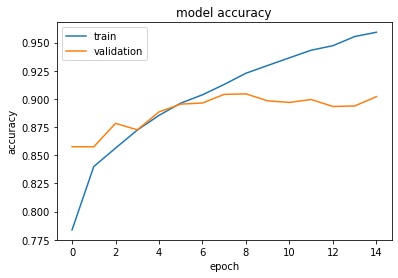

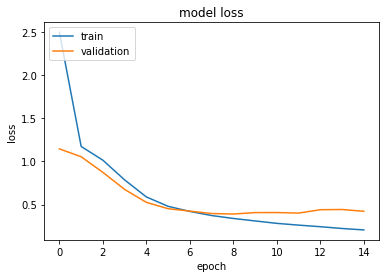

In [6]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
one_hot_encoded_lables = to_categorical(test_lables)
model.evaluate(test_values, one_hot_encoded_lables, batch_size=25)

400/400 [==============================] - 3s 7ms/step - loss: 0.4486 - accuracy: 0.9016


[0.4486106038093567, 0.9016000032424927]